# Point charge

In [96]:
import math

class Charge: 
    def __init__(self, x, y, charge): 
        self.cx = x
        self.cy = y
        self.val = charge
  
    def potential_at(self, x, y): 
        k = 8.99e9
        dx = self.cx - x
        dy = self.cy - y
        dist = math.sqrt(dx**2 + dy**2)
        if dist == 0:
            if self.val >= 0: return float('inf')
            else: return float('-inf')
        else: return k * self.val / dist
    
    def __str__(self):
        return f'{self.val} at ({self.cx}, {self.cy})'
  
charge = Charge(.72, .31, 20.1)
print(charge)
print("%6.2e" % charge.potential_at(.42, .71))

20.1 at (0.72, 0.31)
3.61e+11


In [145]:
%%writefile '09_charges.txt'
.52 .63 -100
.50 .51   40
.48 .72   30

Overwriting 09_charges.txt


In [146]:
charges = []
with open('09_charges.txt') as f:
    for line in f:       
        x,y,val = [float(x) for x in line.split()]
        charge = Charge(x,y,val)
        charges.append(charge)

for c in charges:
    print(c)

-100.0 at (0.52, 0.63)
40.0 at (0.5, 0.51)
30.0 at (0.48, 0.72)


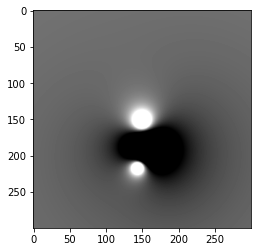

In [151]:
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

def total_potential_at(charges, x, y):
    potential = 0
    for charge in charges:
        potential += charge.potential_at(x,y)
    return potential

def to_color(potential, equipotentials = 1):
    potential = 128 + potential / 2e10
    potential = max(0, min(255, potential))
    potential = potential * equipotentials % 256
    return potential

SIZE = 300
potentials = np.random.rand(SIZE,SIZE)

for y in range(SIZE):
    for x in range(SIZE):
        xn = x / SIZE
        yn = y / SIZE
        potentials[y,x] = total_potential_at(charges,xn,yn)
        
colors = np.copy(potentials)
for y in range(SIZE):
    for x in range(SIZE):
        colors[y,x] = to_color(potentials[y,x])

imshow(colors, cmap='gray')

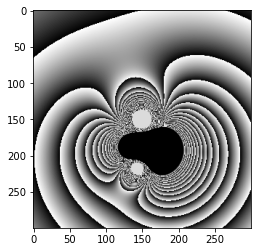

In [159]:
colors = np.copy(potentials)
for y in range(SIZE):
    for x in range(SIZE):
        colors[y,x] = to_color(potentials[y,x], 37)

imshow(colors, cmap='gray')

# Turtles!

In [65]:
from mobilechelonian import Turtle
t = Turtle()

def setup(offset = 60):
    #help(Turtle)
    t.speed(50)
    t.penup()
    t.backward(offset)
    t.right(90)
    t.forward(offset)
    t.left(90)
    t.pendown()  

def triangle(size = 150):
    t.forward(size)
    t.left(120)
    t.forward(size)
    t.left(120)
    t.forward(size)
    t.left(120)
    
def ngon(n = 3, size = 100, decay = 1, prolong = 1):
    angle = 360 / n
    step = size
    for i in range(n * prolong):
        t.forward(step)
        t.left(angle)
        step = step / decay
    
setup(100)
triangle()
ngon(12, 50)
ngon(8, 50, 1.2, 2) # spira mirabilis
t.penup()
t.home()

Turtle()

# Complex numbers

In [66]:
1 + 2j

(1+2j)

Python uses j instead of i since it is following engineering, not math notation for complex numbers. Plus using i or I would make complex numbers be easily mistakengly parsed by humans as normal numbers.

Applications of complex numbers are: signal processing, control theory, quantum mechanics, analysys of algorithms, etc.

In [70]:
a = 3 + 4j
b = -2 + 3j
print(a + b)
print(a * b)
print(abs(a))

(1+7j)
(-18+1j)
5.0


In [69]:
abs(a)

5.0

### Mandelbrot set

Black points are in the set, white are outside.

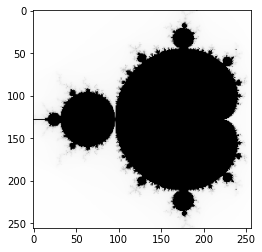

In [136]:
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

def get_mandelbrot(xc = -0.5, yc = 0, size = 2, screen = 256):
    mandelbrot = np.random.rand(screen,screen)
    
    def to_complex_number(x, y):
        real =  xc + x / screen * size - size / 2
        img = -(yc + y / screen * size - size / 2)
        return complex(real, img)

    # It was a bool return value, but for a preatier visualization 
    # we can encode on what iteration z reached infinity
    # threshold = 2 was mathematically proven
    # iteration cap is a pseudo fact
    def is_in_mandelbrot_set(number, iterations = 255, threshold = 2):
        z0 = z = number
        for t in range(iterations):
            z = z*z + z0
            if abs(z) > threshold: return 255 - t
        return 0

    for y in range(screen):
        for x in range(screen):
            number = to_complex_number(x,y)
            mandelbrot[y,x] = is_in_mandelbrot_set(number)
    
    return mandelbrot
        
imshow(get_mandelbrot(), cmap='gray')

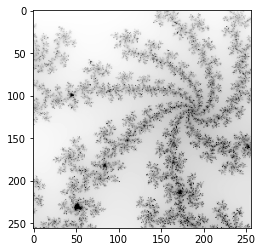

In [137]:
imshow(get_mandelbrot(.1045, -.637, .01), cmap='gray')